<a href="https://colab.research.google.com/github/OnyekaEkesi/Cognifyz-Technologies-Projects-Restaurant-Dataset-Analysis-and-Modelling/blob/main/Cognifyz_Tech_Project_Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGNIFYZ INTERNSHIP PROJECT - LEVEL 3

## Name: Onyekachukwu Ekesi - Data Science Intern

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore, pearsonr, norm
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import shap
import time
import joblib
import folium
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
from sklearn.metrics import make_scorer
from folium.plugins import MarkerCluster


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant.csv')
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [ ]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 9551
Number of columns: 21


In [ ]:
print("\nData Types and Info:")
data.info()


Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15 

In [ ]:

print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: >

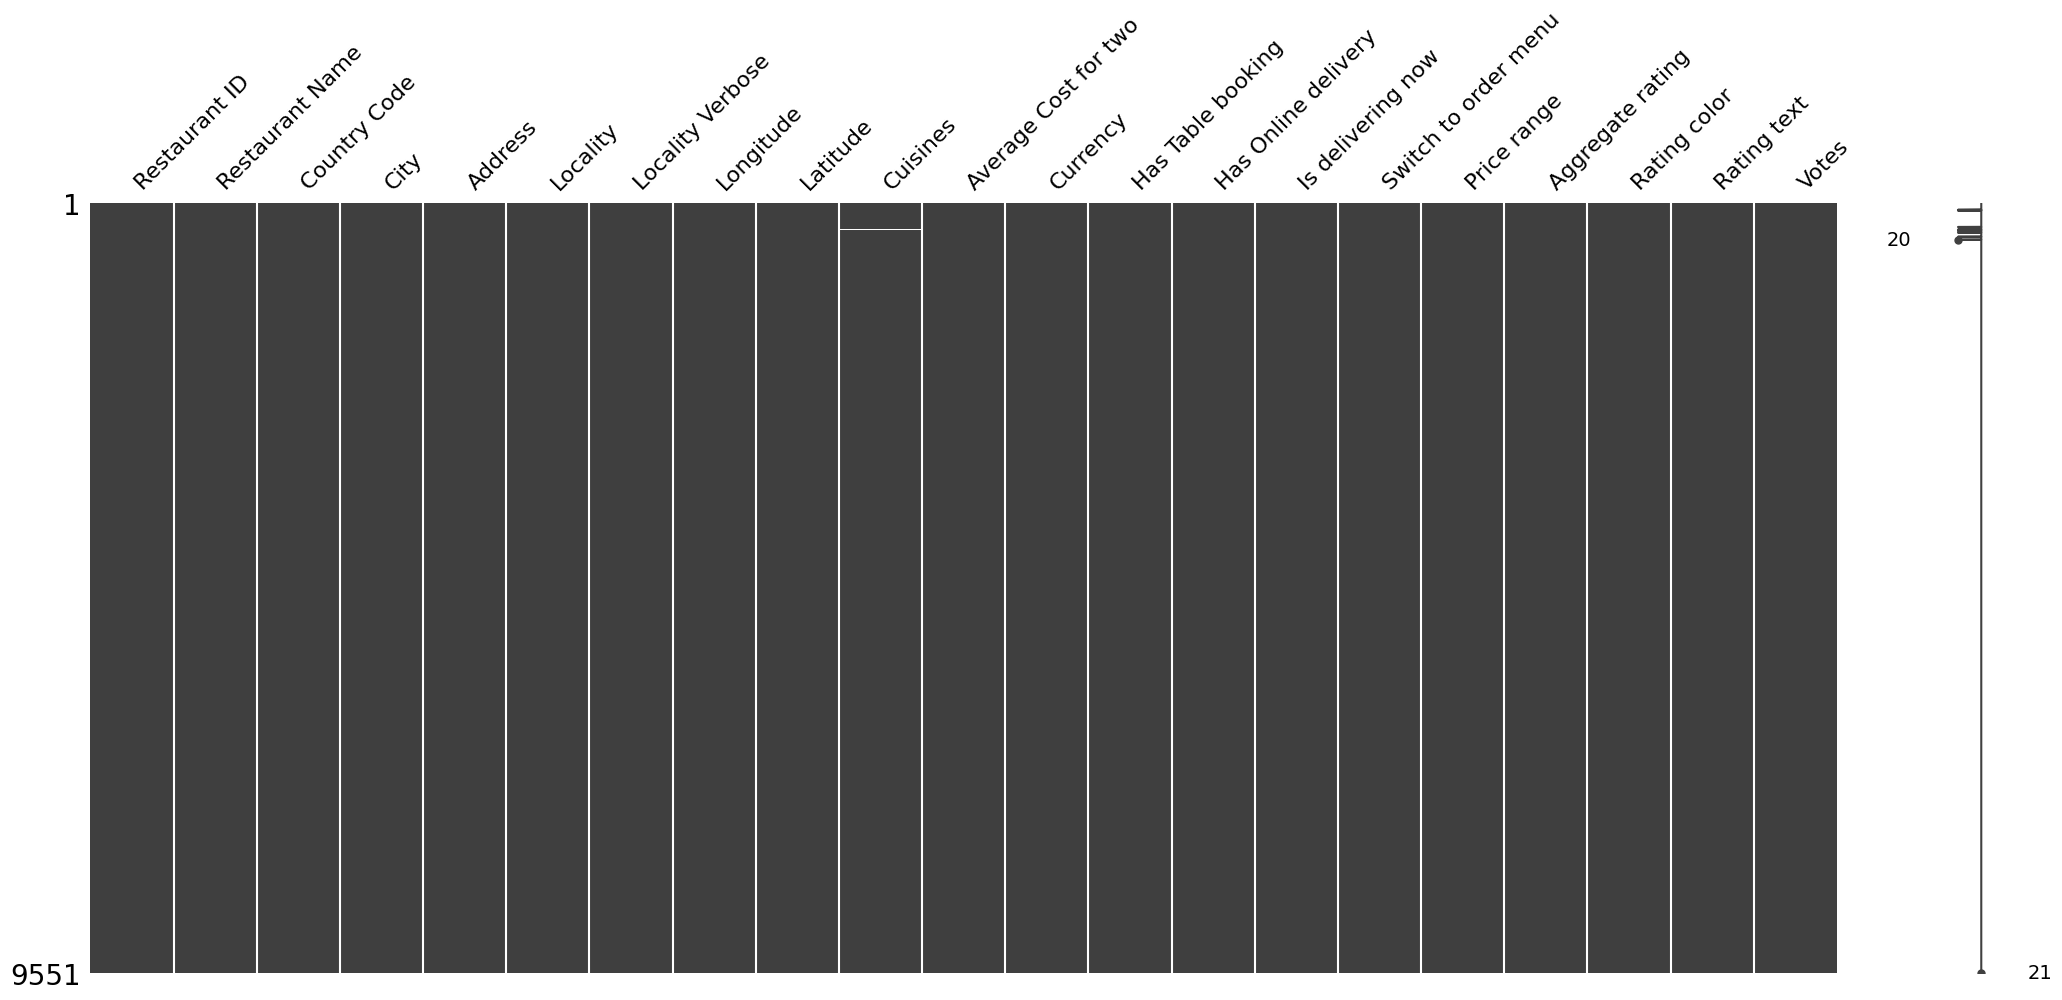

In [ ]:
# Visualize missing data patterns
msno.matrix(data)

In [ ]:
print("Missing values in:",  data.isna().sum())

Missing values in: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
#Replacing the null values in 'Cuisines' with the mode
data['Cuisines'].fillna(data['Cuisines'].mode().iloc[0], inplace=True)

#Check again for null values
print(data['Cuisines'].isna().sum())

0


# Level 2
## Task 2: Table Booking and Online Delivery

* Determine the percentage of restaurants that
offer table booking and online delivery.

* Compare the average ratings of restaurants
with table booking and those without.

* Analyze the availability of online delivery
among restaurants with different price ranges.

In [ ]:
# 1. Percentage of restaurants offering table booking & online delivery
table_booking_pct = data['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_pct = data['Has Online delivery'].value_counts(normalize=True) * 100

print("Percentage offering Table Booking:")
print(table_booking_pct, "\n")
print("Percentage offering Online Delivery:")
print(online_delivery_pct, "\n")

Percentage offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64 

Percentage offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64 



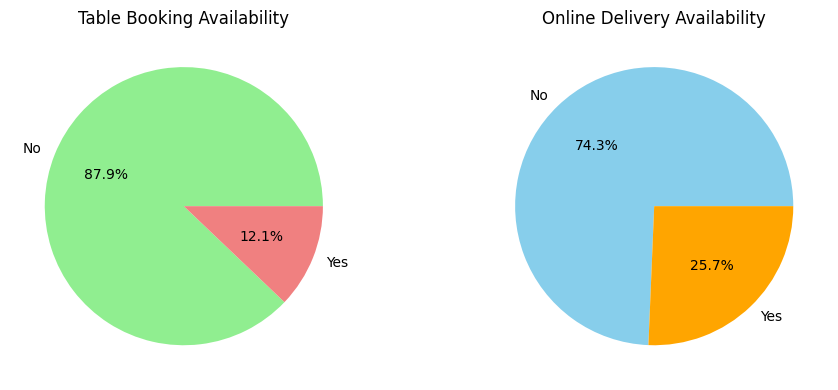

In [ ]:
# Plot - Percentage Offering Table Booking & Online Delivery ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

data['Has Table booking'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[0],
    colors=['lightgreen', 'lightcoral']
)
axes[0].set_title('Table Booking Availability')
axes[0].set_ylabel('')

data['Has Online delivery'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=axes[1],
    colors=['skyblue', 'orange']
)
axes[1].set_title('Online Delivery Availability')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# 2. Compare average ratings with & without table booking
avg_rating_booking = data.groupby('Has Table booking')['Aggregate rating'].mean()
print("Average Ratings (With vs Without Table Booking):")
print(avg_rating_booking, "\n")

Average Ratings (With vs Without Table Booking):
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64 



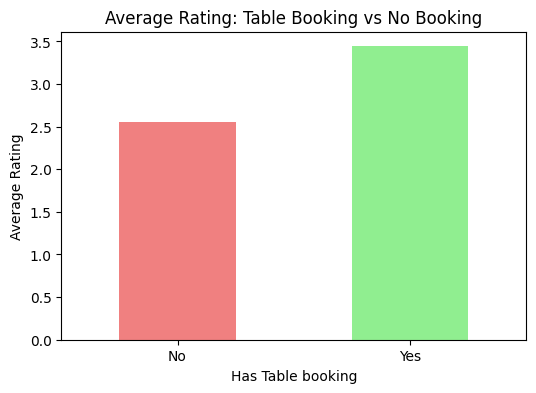

In [ ]:
# Plot - Average Rating: With vs Without Table Booking ---
avg_rating_booking.plot(
    kind='bar',
    color=['lightcoral', 'lightgreen'],
    figsize=(6, 4)
)
plt.title('Average Rating: Table Booking vs No Booking')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 3. Analyze online delivery availability across price ranges
online_delivery_price = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print("Online Delivery Availability by Price Range (%):")
print(online_delivery_price)

Online Delivery Availability by Price Range (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


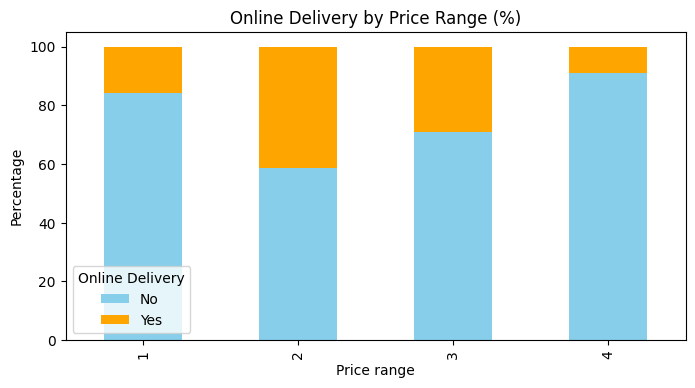

In [ ]:
# --- 3. Online Delivery Availability by Price Range ---
online_delivery_price.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=['skyblue', 'orange']
)
plt.title('Online Delivery by Price Range (%)')
plt.ylabel('Percentage')
plt.legend(title='Online Delivery')
plt.show()

## Task 2: Price Range Analysis
* Determine the most common price range
among all the restaurants.

* Calculate the average rating for each price
range.
* Identify the color that represents the highest
average rating among different price ranges.


***The most common price range among all the restaurants.***

In [ ]:
# --- 1. Most Common Price Range ---
most_common_price = data['Price range'].mode()[0]
print(f"Most common price range: {most_common_price}")

Most common price range: 1


***Average rating for each price range***

In [ ]:
# --- 2. Average Rating per Price Range ---
avg_rating_price = data.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("\nAverage rating for each price range:")
print(avg_rating_price)


Average rating for each price range:
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


In [ ]:
# --- 3. Price Range vs Rating Color ---
avg_rating_color = (
    data.groupby('Price range')[['Aggregate rating', 'Rating color']]
    .mean(numeric_only=True)
    .reset_index()
)

# Since "Rating color" is categorical, get the color for the highest avg rating
highest_rating_price = avg_rating_price.loc[avg_rating_price['Aggregate rating'].idxmax(), 'Price range']
highest_rating_color = data[data['Price range'] == highest_rating_price]['Rating color'].mode()[0]

print(f"\nPrice range with highest average rating: {highest_rating_price}")
print(f"Color representing highest avg rating: {highest_rating_color}")


Price range with highest average rating: 4
Color representing highest avg rating: Yellow


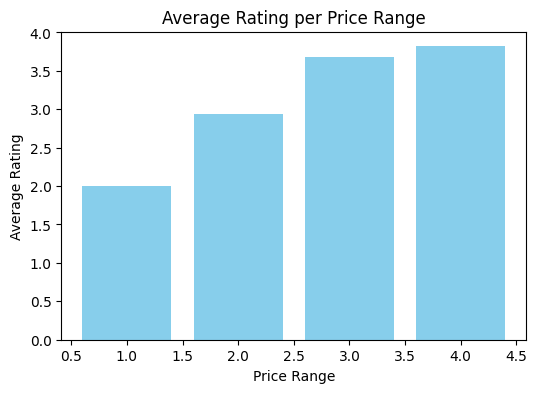

In [ ]:
# --- Visualization ---

plt.figure(figsize=(6, 4))
plt.bar(avg_rating_price['Price range'], avg_rating_price['Aggregate rating'], color='skyblue')
plt.title("Average Rating per Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

***Identify the color that represents the highest
average rating among different price ranges.***

In [ ]:
# Get the most frequent Rating color per Price Range ---
rating_colors = (
    data.groupby('Price range')['Rating color']
    .agg(lambda x: x.mode()[0])  # most frequent color
    .reset_index()
)

# Merge to match colors with avg ratings
avg_rating_price = avg_rating_price.merge(rating_colors, on='Price range', how='left')

#  Identify highest rating price range and its color ---
highest_rating_row = avg_rating_price.loc[avg_rating_price['Aggregate rating'].idxmax()]
print(f"Price range with highest average rating: {highest_rating_row['Price range']}")
print(f"Color representing highest avg rating: {highest_rating_row['Rating color']}")

Price range with highest average rating: 4
Color representing highest avg rating: Yellow


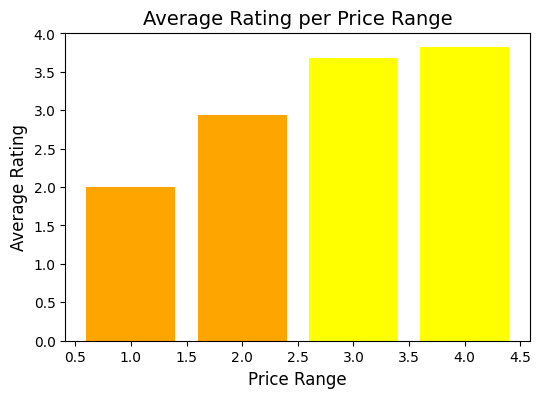

In [ ]:
# Visualization with actual rating colors ---
plt.figure(figsize=(6, 4))
plt.bar(
    avg_rating_price['Price range'],
    avg_rating_price['Aggregate rating'],
    color=avg_rating_price['Rating color']  # directly use colors
)
plt.title("Average Rating per Price Range", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=0)
plt.show()

## Task 3: Feature Engineering
* Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

* Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [ ]:
# 1. Extract additional features
data['Restaurant_Name_Length'] = data['Restaurant Name'].apply(len)
data['Address_Length'] = data['Address'].apply(len)

# 2. Encode categorical Yes/No columns into binary features
yes_no_map = {'Yes': 1, 'No': 0}
data['Has_Table_Booking'] = data['Has Table booking'].map(yes_no_map)
data['Has_Online_Delivery'] = data['Has Online delivery'].map(yes_no_map)

# 3. Quick check of new features
print(data[['Restaurant Name', 'Restaurant_Name_Length', 'Address', 'Address_Length',
            'Has_Table_Booking', 'Has_Online_Delivery']].head())

          Restaurant Name  Restaurant_Name_Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address_Length  \
0  Third Floor, Century City Mall, Kalayaan Avenu...              71   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64   

   Has_Table_Booking  Has_Online_Delivery  
0                  1                    0  
1                  1                    0  
2                  1                    0  
3                  0                    0  
4                  1        

# Level 3
## Task 2: Predictive Modeling
* Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
* appropriate metrics.
Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [ ]:
# Exclude non-numeric columns before calculating correlation
data_numeric = data.select_dtypes(include=np.number)
data_corr = data_numeric.corr()

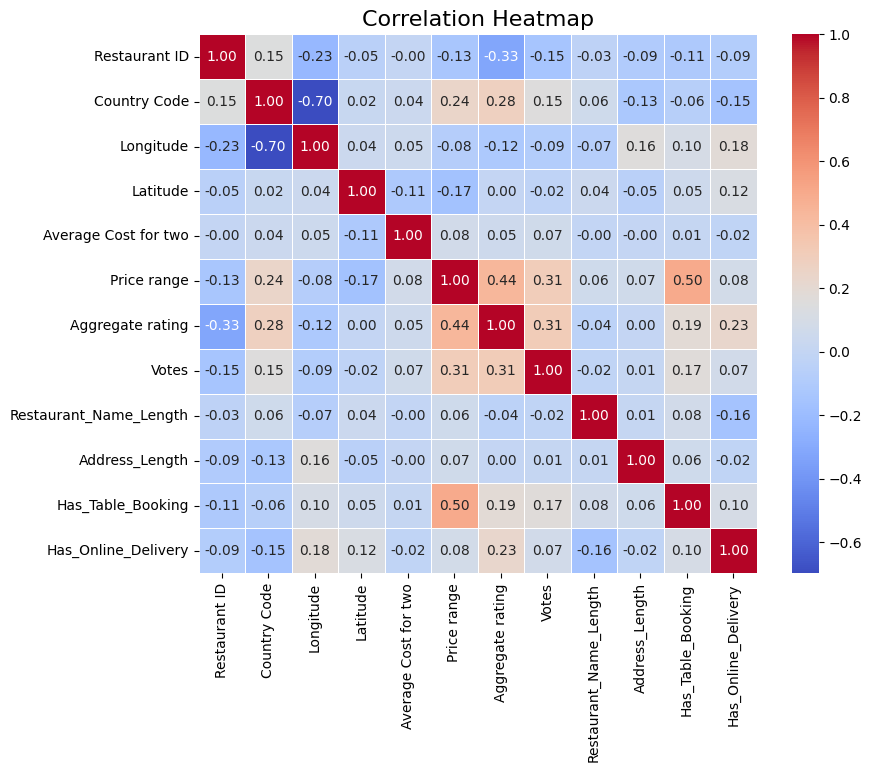

In [ ]:
# Plot heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Features against Target Variables**

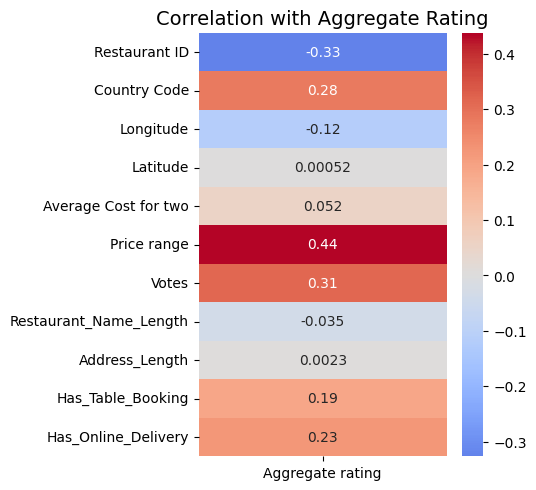

In [ ]:
# Select numeric columns
data_numeric = data.select_dtypes(include='number')

# Correlation with target variable
target_corr = data_numeric.corr()[['Aggregate rating']].drop('Aggregate rating')

# Heatmap
plt.figure(figsize=(4, len(target_corr) * 0.5))  # Adjust height based on number of features
sns.heatmap(
    target_corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar=True
)
plt.title("Correlation with Aggregate Rating", fontsize=14)
plt.show()

In [ ]:
# --- Select features and target ---
X = data.drop(columns=['Aggregate rating'])  # Features
y = data['Aggregate rating']  # Target

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define models ---
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# --- Evaluate each model ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

# --- Show results ---
results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE      RMSE        R²
0  Linear Regression  0.235987  0.303436  0.959548
1      Decision Tree  0.140816  0.223841  0.977987
2      Random Forest  0.109577  0.165045  0.988032


## Task 2: Customer Preference Analysis
* Analyze the relationship between the type of
cuisine and the restaurant's rating.
* Identify the most popular cuisines among
customers based on the number of votes.
* Determine if there are any specific cuisines
that tend to receive higher ratings.

***Analyze the relationship between the type of cuisine and the restaurant's rating***

In [ ]:
# Average rating per cuisine
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(cuisine_rating.head(20))  # Top 10 cuisines by rating

Cuisines
Burger, Bar Food, Steak            4.90
American, Burger, Grill            4.90
American, Caribbean, Seafood       4.90
American, Coffee and Tea           4.90
Mexican, American, Healthy Food    4.90
Italian, Bakery, Continental       4.90
BBQ, Breakfast, Southern           4.90
European, German                   4.90
Hawaiian, Seafood                  4.90
Sunda, Indonesian                  4.90
American, BBQ, Sandwich            4.90
World Cuisine                      4.90
Continental, Indian                4.90
American, Sandwich, Tea            4.90
Mughlai, Lucknowi                  4.90
European, Contemporary             4.90
European, Asian, Indian            4.90
Italian, Deli                      4.90
Filipino, Mexican                  4.85
Beverages, International           4.80
Name: Aggregate rating, dtype: float64


***Identify the most popular cuisines among customers based on the number of votes.***

In [ ]:
# Total votes per cuisine
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(cuisine_votes.head(10))  # Top 10 cuisines by votes

Cuisines
North Indian, Mughlai             53747
North Indian                      48967
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


***Identify cuisines that tend to receive higher ratings***

In [ ]:
# High-rated cuisines (avg rating > 4.0)
total_high_rated_cuisines = cuisine_rating[cuisine_rating > 4.0].sum()
high_rated_cuisines = cuisine_rating[cuisine_rating > 4.0]
print("The sum of Cuisines rated above 4.0 is: ", total_high_rated_cuisines)
print(high_rated_cuisines)

The sum of Cuisines rated above 4.0 is:  2107.31086968587
Cuisines
Burger, Bar Food, Steak                      4.900000
American, Burger, Grill                      4.900000
American, Caribbean, Seafood                 4.900000
American, Coffee and Tea                     4.900000
Mexican, American, Healthy Food              4.900000
                                               ...   
North Indian, Fast Food, Italian, Asian      4.033333
Chinese, North Indian, Fast Food, Italian    4.033333
North Indian, Continental, Mughlai, Asian    4.033333
Pizza, Bar Food                              4.033333
American, Breakfast, Burger                  4.033333
Name: Aggregate rating, Length: 486, dtype: float64


***A side-by-side plot for average rating and popularity***

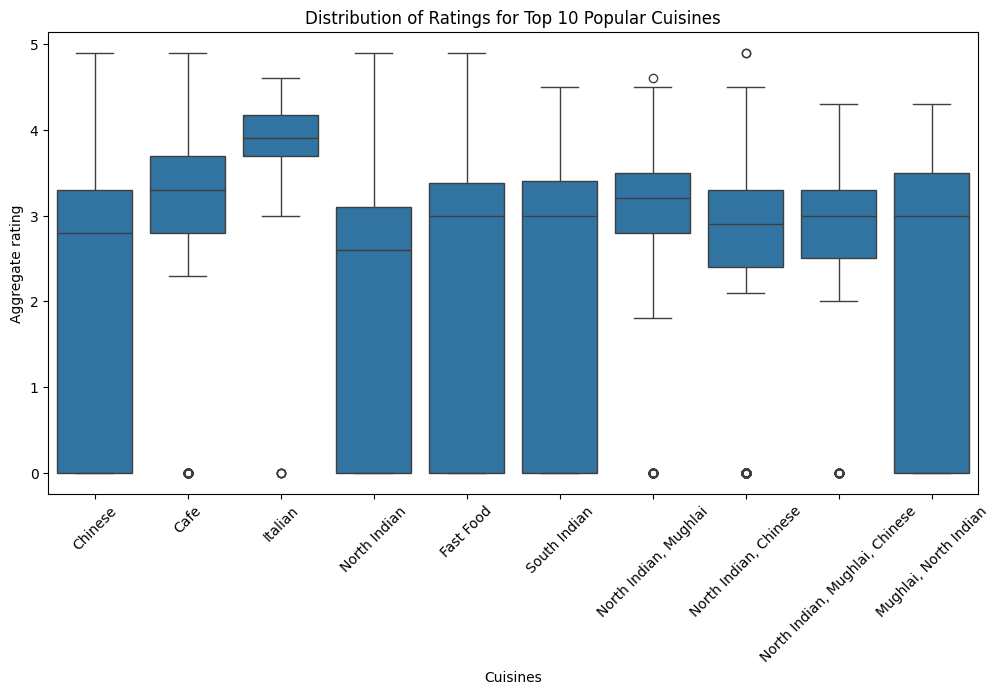

In [ ]:
# Top 10 cuisines by votes
top_cuisines = cuisine_votes.head(10).index
plot_data = data[data['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=plot_data)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings for Top 10 Popular Cuisines')
plt.show()

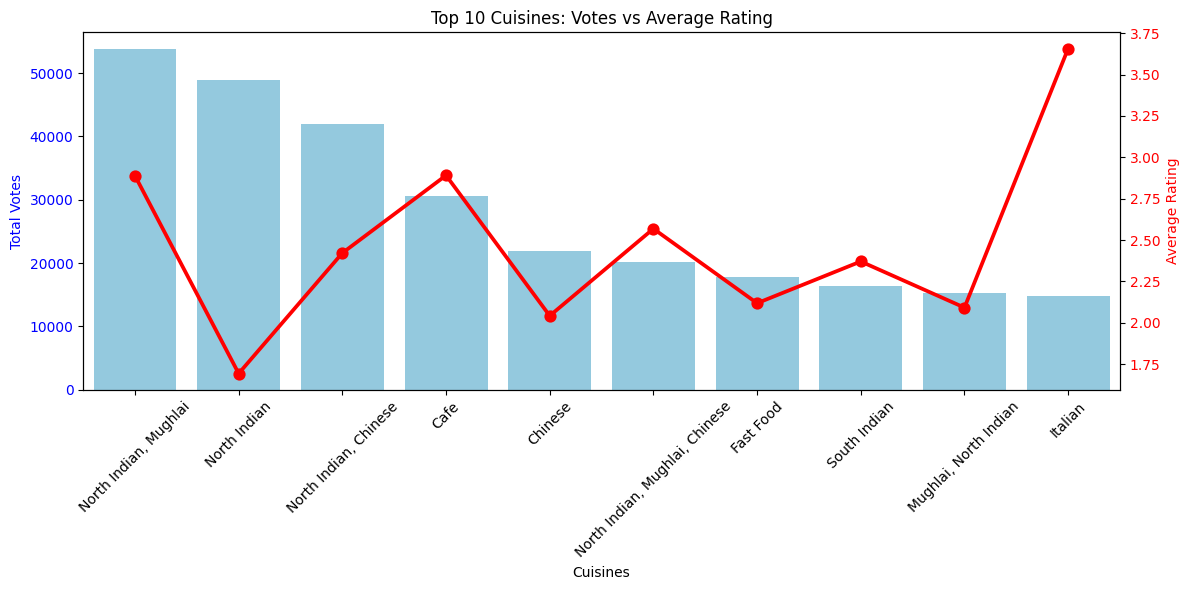

In [ ]:
# Prepare data for grouped bar chart
top_cuisine_stats = data.groupby('Cuisines').agg({
    'Votes': 'sum',
    'Aggregate rating': 'mean'
}).loc[top_cuisines].reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

# Votes (left y-axis)
sns.barplot(x='Cuisines', y='Votes', data=top_cuisine_stats, color='skyblue', ax=ax1)
ax1.set_ylabel('Total Votes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Ratings (right y-axis)
ax2 = ax1.twinx()
sns.pointplot(x='Cuisines', y='Aggregate rating', data=top_cuisine_stats, color='red', ax=ax2)
ax2.set_ylabel('Average Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Top 10 Cuisines: Votes vs Average Rating')
plt.tight_layout()
plt.show()

## Task 3: Data Visualization
* Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).
* Compare the average ratings of different cuisines
or cities using appropriate visualizations.
* Visualize the relationship between various
features and the target variable to gain insights.

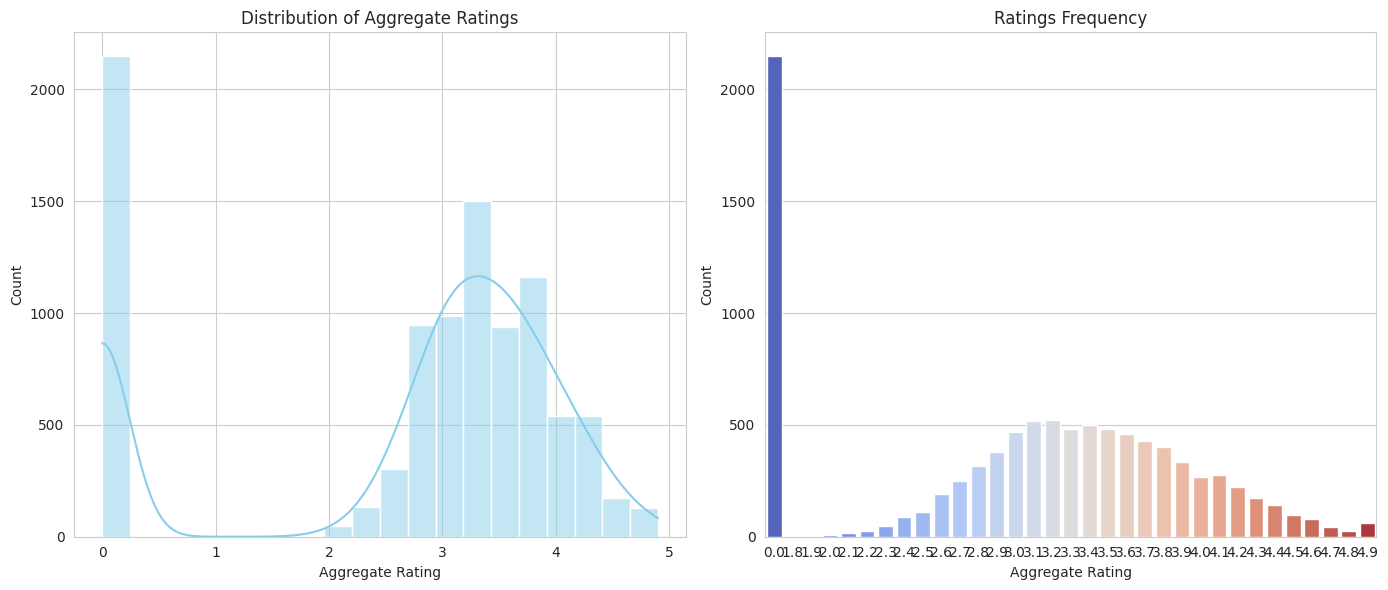

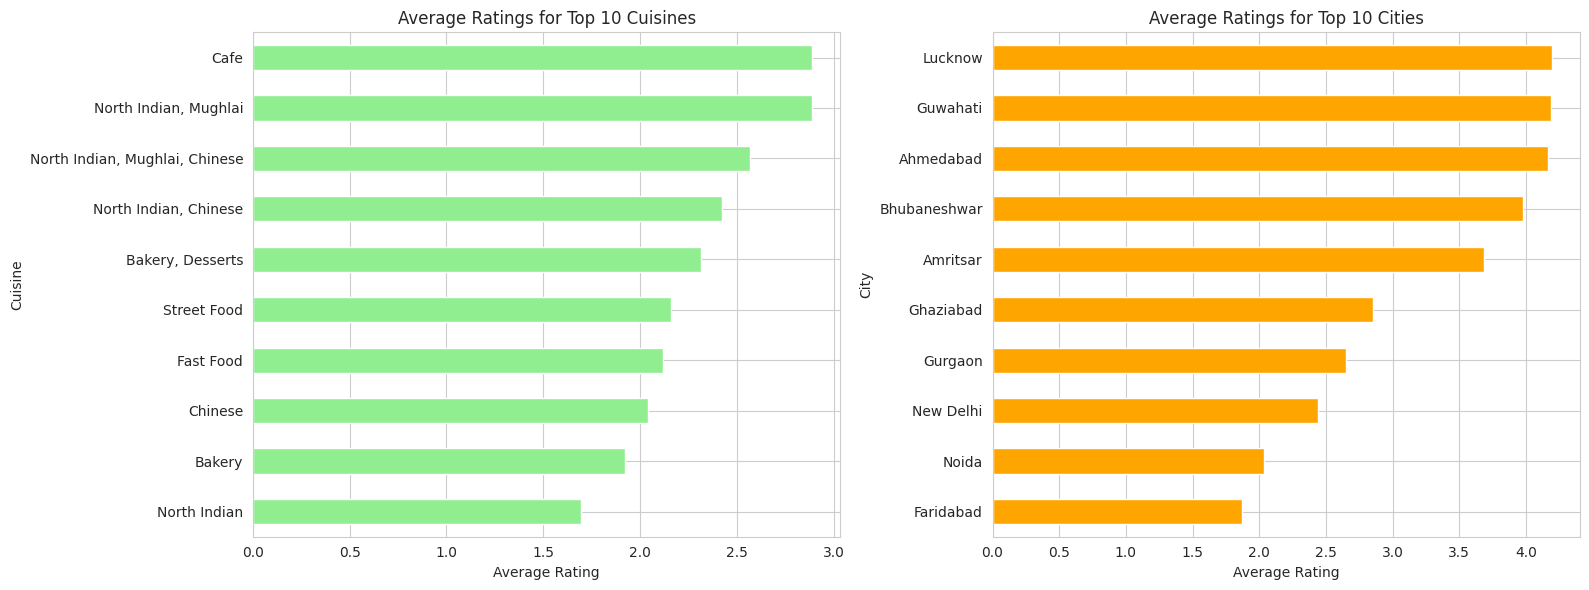

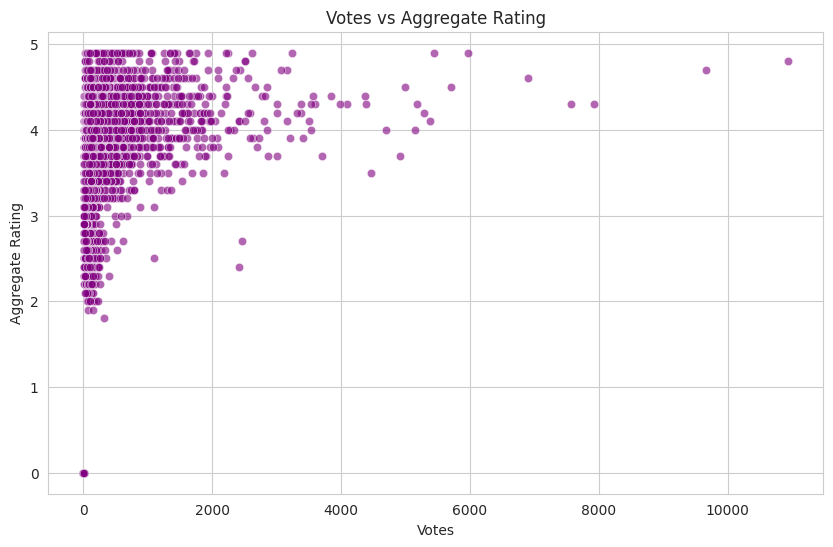

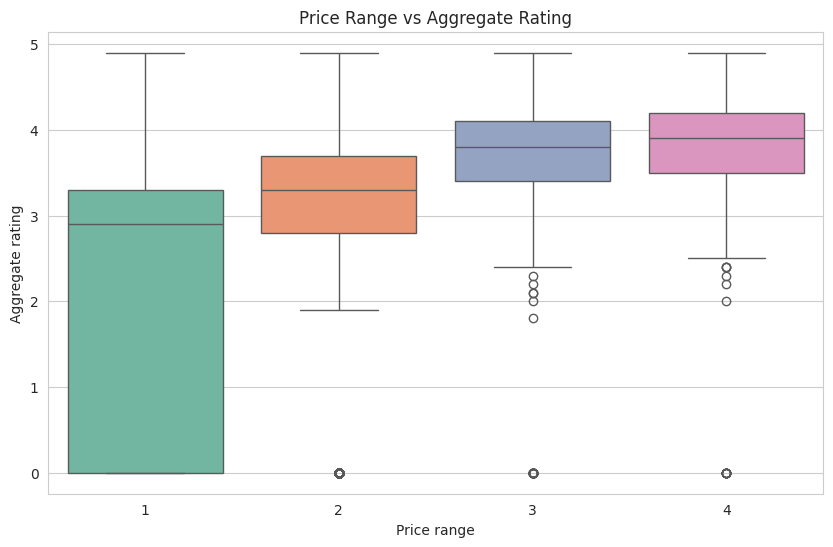

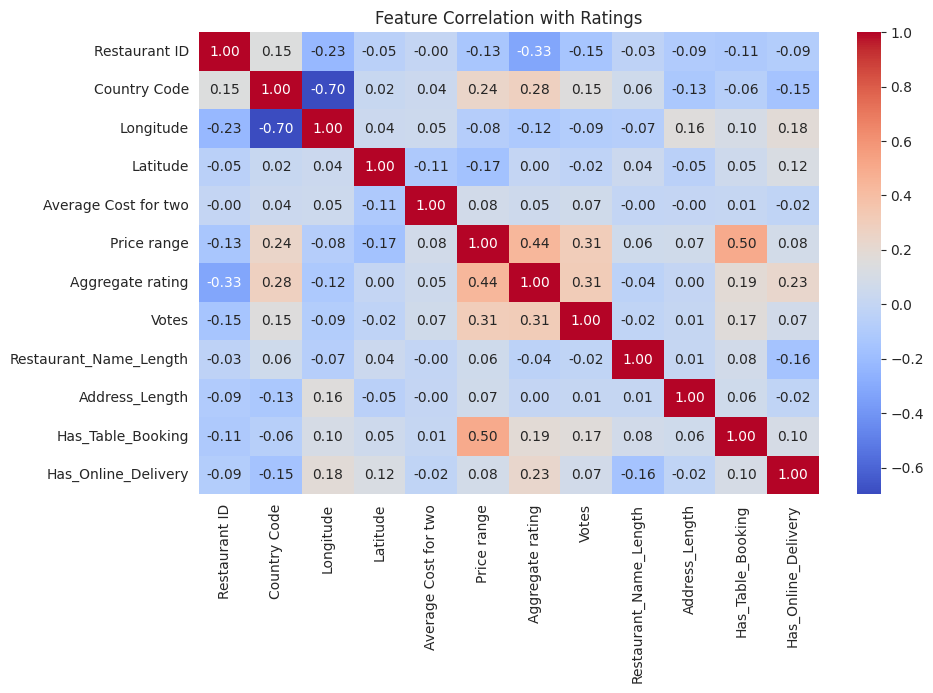

In [ ]:
# Set consistent style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 1️⃣ Distribution of Ratings
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Histogram
sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Distribution of Aggregate Ratings')
ax[0].set_xlabel('Aggregate Rating')
ax[0].set_ylabel('Count')

# Count plot
sns.countplot(x='Aggregate rating', data=data, order=sorted(data['Aggregate rating'].unique()), palette='coolwarm', ax=ax[1])
ax[1].set_title('Ratings Frequency')
ax[1].set_xlabel('Aggregate Rating')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 2️⃣ Average Ratings of Cuisines & Cities

# Top 10 cuisines
top_cuisines = data['Cuisines'].value_counts().head(10).index
avg_rating_cuisines = data[data['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values()

# Top 10 cities
top_cities = data['City'].value_counts().head(10).index
avg_rating_cities = data[data['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(16,6))

avg_rating_cuisines.plot(kind='barh', color='lightgreen', ax=ax[0])
ax[0].set_title('Average Ratings for Top 10 Cuisines')
ax[0].set_xlabel('Average Rating')
ax[0].set_ylabel('Cuisine')

avg_rating_cities.plot(kind='barh', color='orange', ax=ax[1])
ax[1].set_title('Average Ratings for Top 10 Cities')
ax[1].set_xlabel('Average Rating')
ax[1].set_ylabel('City')

plt.tight_layout()
plt.show()

# 3️⃣ Relationship Between Features & Ratings

# Scatter: Votes vs Rating
sns.scatterplot(x='Votes', y='Aggregate rating', data=data, alpha=0.6, color='purple')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# Boxplot: Price Range vs Rating
sns.boxplot(x='Price range', y='Aggregate rating', data=data, palette='Set2')
plt.title('Price Range vs Aggregate Rating')
plt.show()

# Correlation heatmap (numeric only)
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Ratings')
plt.show()
